In [1]:
import xarray as xr
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
# Load dataset
file1 = xr.open_dataset('~/Parameters/FjordModeling/Qsg_maxhs_qsm0.nc')
file2 = xr.open_dataset('~/Parameters/FjordModeling/Qsg_minhs_qsm0.nc')
#file3 = xr.open_dataset('~/Parameters/FjordModeling/Qsg_nosill.nc')


Qsg = file1.Qsg.data
alp11_1 = file1.alpha11.data
alp11_1[alp11_1<0] = 0
alp22_1 = file1.alpha22.data
Qin1_maxhs = file1.Qin1.data
Qin2_maxhs = file1.Qin2.data
Qe1 = Qin1_maxhs-Qin2_maxhs
Qsm1 = file1.Qsm.data
Tsr1 = file1.Ts.data / file1.Ts_in.data
Tsre1 = file1.Ts_e.data / file1.Ts_in.data

alp11_2 = file2.alpha11.data
alp11_2[alp11_2<0] = 0
alp22_2 = file2.alpha22.data
Qin1_minhs = file2.Qin1.data
Qin2_minhs = file2.Qin2.data
Qe2 = Qin1_minhs-Qin2_minhs
Qsm2 = file2.Qsm.data
Tsr2 = file2.Ts.data / file2.Ts_in.data
Tsre2 = file2.Ts_e.data / file2.Ts_in.data

#Qsm3 = file3.Qsm.data

In [2]:
# Load dataset
file1 = xr.open_dataset('~/Parameters/FjordModeling/2_Qsg_maxhs.nc')
file2 = xr.open_dataset('~/Parameters/FjordModeling/2_Qsg_minhs.nc')


Qsg = file1.Qsg.data
alp11_1 = file1.alpha11.data
alp22_1 = file1.alpha22.data



for i in range(len(alp11_1)):
    if (alp22_1[i] < 0) or (alp11_1[i] > 1):
        alp11_1[i] = (file1.Qin1_adj.data[i]-file1.Qout2_adj.data[i]) / file1.Qin1_adj.data[i]
        alp22_1[i] = 0
    else:
        alp11_1[i] = alp11_1[i]
        alp22_1[i] = alp22_1[i]

Tse1 = (file1.Ts_in.data*file1.Qin2_adj.data*(1-alp22_1) + file1.Tf.data*file1.Qin1_adj.data*alp11_1) / file1.Qout1_adj.data
Tsre1 = Tse1 / file1.Ts_in.data

Qe1 = file1.Qout1_adj.data - file1.Qin2_adj.data
Qsm1 = file1.Qsm.data




alp11_2 = file2.alpha11.data
alp22_2 = file2.alpha22.data


for i in range(len(alp11_2)):
    if (alp22_2[i] < 0) or (alp11_2[i] > 1):
        alp11_2[i] = (file2.Qin1_adj.data[i]-file2.Qout2_adj.data[i]) / file2.Qin1_adj.data[i]
        alp22_2[i] = 0
    else:
        alp11_2[i] = alp11_2[i]
        alp22_2[i] = alp22_2[i]

Tse2 = (file2.Ts_in.data*file2.Qin2_adj.data*(1-alp22_2) + file2.Tf.data*file2.Qin1_adj.data*alp11_2) / file2.Qout1_adj.data
Tsre2 = Tse2 / file2.Ts_in.data

Qe2 = file2.Qout1_adj.data - file2.Qin2_adj.data
Qsm2 = file2.Qsm.data



Qout1_adj2 = file2.Qout1_adj.data


In [33]:
#np.arange(0,1050,50)
Tse1, Tse2, file1.Ts.data, file2.Ts.data

(array([9.77774089, 9.70084398, 9.69023965, 9.86289493, 9.86487897,
        9.85050523]),
 array([7.72563257, 7.66814329, 9.24678539, 9.16914879, 8.92773027,
        8.49562019]),
 array([9.81597974, 9.82258472, 9.83777897, 9.89996634, 9.91244303,
        9.89802186]),
 array([6.98523104, 7.51684579, 9.53931362, 9.55170132, 9.45156416,
        9.25854978]))

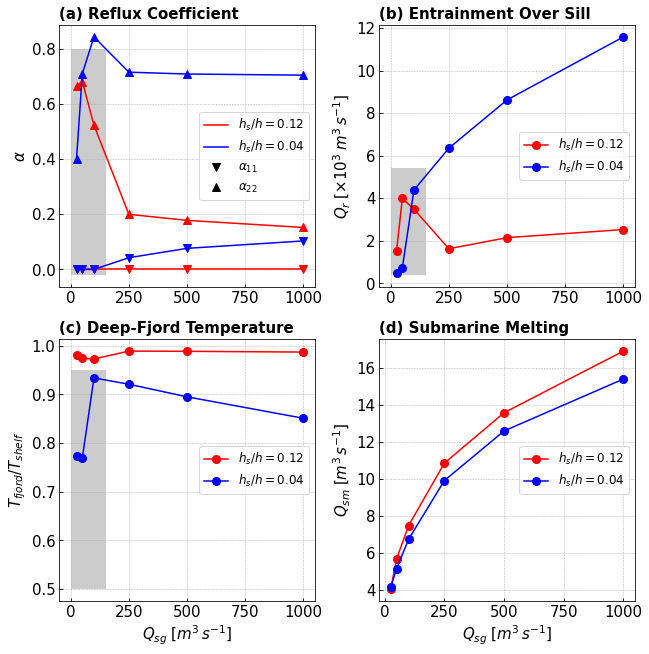

In [3]:
fig1 = plt.figure(figsize=(10,10))
#fig1.tight_layout()
#plt.grid(linestyle='--', linewidth=0.5)    
ax1 = fig1.add_subplot(221)
ax2 = fig1.add_subplot(222)
ax3 = fig1.add_subplot(223)
ax4 = fig1.add_subplot(224)

# Reflux coeff plot
ax1.plot(Qsg,alp11_1,'^-r', Qsg,alp22_1,'v-r', ms=8,lw=1.5)
ax1.plot(Qsg,alp11_2,'^-b', Qsg,alp22_2,'v-b', ms=8,lw=1.5)

line1 = plt.Line2D((0,1),(0,0), color='r', lw=1.5, linestyle='-')
line2 = plt.Line2D((0,1),(0,0), color='b', lw=1.5, linestyle='-')
marker1 = plt.Line2D((0,1),(0,0), color='k', marker='v', ms=8,linestyle='')
marker2 = plt.Line2D((0,1),(0,0), color='k', marker='^', ms=8,linestyle='') 
ax1.legend([line1,line2,marker1,marker2],[r'$h_s/h=0.12$',r'$h_s/h=0.04$',r'$\alpha_{11}$', r'$\alpha_{22}$'],
              loc='best', fontsize=12)

ax1.grid(linestyle='--', linewidth=0.5)
ax1.set_ylabel(r'$\alpha$',size = 15)
ax1.tick_params(direction='in', labelsize=15)
ax1.set_title(r'(a) Reflux Coefficient', loc='left', size=15, weight='bold')


# Add path for uncertain values
from matplotlib.patches import Rectangle
rect1 = Rectangle((0,-.02),150,.82,facecolor='k',alpha=0.2)
# Add the patch to the Axes
ax1.add_patch(rect1)


# Qe plot
ax2.plot(Qsg,Qe1/1e3,'o-r', Qsg,Qe2/1e3,'o-b',ms=8, lw=1.5)
ax2.legend([r'$h_s/h=0.12$',r'$h_s/h=0.04$'],loc='right', fontsize=12)
ax2.set_ylabel(r'$Q_r\;[\times10^3\;m^3\,s^{-1}]$',size = 15)
ax2.grid(linestyle='--', linewidth=0.5)
ax2.tick_params(direction='in', labelsize=15)
ax2.set_title(r'(b) Entrainment Over Sill', loc='left', size=15, weight='bold')

# Add path for uncertain values
#rect2 = Rectangle((0,.5),150,.45,facecolor='k',alpha=0.2)
rect2 = Rectangle((0,.4),150,5,facecolor='k',alpha=0.2)
# Add the patch to the Axes
ax2.add_patch(rect2)



# T_fjord/T_shelf plot
ax3.plot(Qsg,Tsre1,'o-r', Qsg,Tsre2,'o-b',ms=8, lw=1.5)
ax3.legend([r'$h_s/h=0.12$',r'$h_s/h=0.04$'],loc='right', fontsize=12)
ax3.set_xlabel(r'$Q_{sg}\;[m^3\,s^{-1}]$',size = 15)
ax3.set_ylabel(r'$T_{fjord}/T_{shelf}$',size =15)
ax3.grid(linestyle='--', linewidth=0.5)
ax3.tick_params(direction='in', labelsize=15)
ax3.set_title(r'(c) Deep-Fjord Temperature', loc='left', size=15, weight='bold')

# Add path for uncertain values
rect3 = Rectangle((0,.5),150,.45,facecolor='k',alpha=0.2)
# Add the patch to the Axes
ax3.add_patch(rect3)


# Qsm plot
# qsg = np.arange(0,1050,50)
# ax4.plot(qsg,qsg**(2/5), 'k-',lw=2)
ax4.plot(Qsg,Qsm1,'o-r', Qsg,Qsm2,'o-b',ms=8, lw=1.5)
ax4.legend([r'$h_s/h=0.12$',r'$h_s/h=0.04$'],loc='right', fontsize=12)
ax4.set_xlabel(r'$Q_{sg}\;[m^3\,s^{-1}]$',size = 15)
ax4.set_ylabel(r'$Q_{sm}\;[m^3\,s^{-1}]$',size = 15)
ax4.grid(linestyle='--', linewidth=0.5)
ax4.tick_params(direction='in', labelsize=15)
ax4.set_title(r'(d) Submarine Melting', loc='left', size=15, weight='bold')

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.2)

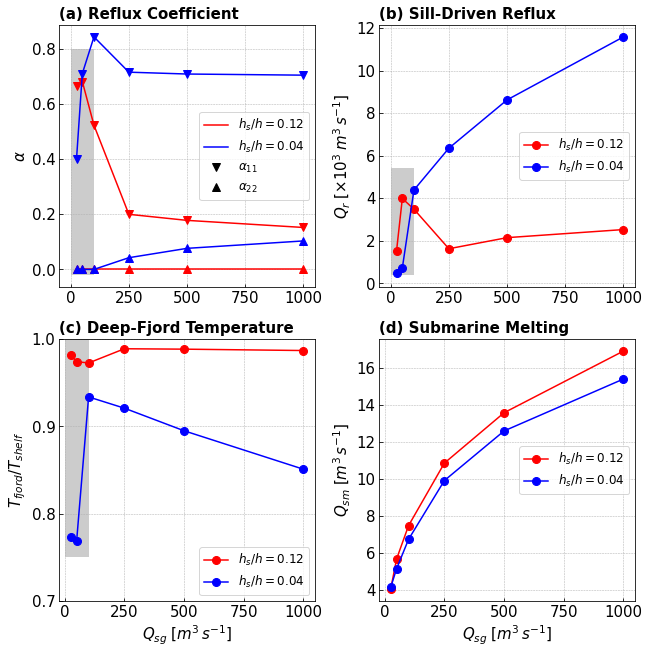

In [4]:
fig2 = plt.figure(figsize=(10,10))
#fig1.tight_layout()
#plt.grid(linestyle='--', linewidth=0.5)    
ax1 = fig2.add_subplot(221)
ax2 = fig2.add_subplot(222)
ax3 = fig2.add_subplot(223)
ax4 = fig2.add_subplot(224)

# Reflux coeff plot
ax1.plot(Qsg,alp11_1,'v-r', Qsg,alp22_1,'^-r', ms=8,lw=1.5)
ax1.plot(Qsg,alp11_2,'v-b', Qsg,alp22_2,'^-b', ms=8,lw=1.5)

line1 = plt.Line2D((0,1),(0,0), color='r', lw=1.5, linestyle='-')
line2 = plt.Line2D((0,1),(0,0), color='b', lw=1.5, linestyle='-')
marker1 = plt.Line2D((0,1),(0,0), color='k', marker='v', ms=8,linestyle='')
marker2 = plt.Line2D((0,1),(0,0), color='k', marker='^', ms=8,linestyle='') 
ax1.legend([line1,line2,marker1,marker2],[r'$h_s/h=0.12$',r'$h_s/h=0.04$',r'$\alpha_{11}$', r'$\alpha_{22}$'],
              loc='best', fontsize=12)

ax1.grid(linestyle='--', linewidth=0.5)
ax1.set_ylabel(r'$\alpha$',size = 15)
ax1.tick_params(direction='in', labelsize=15)
ax1.set_title(r'(a) Reflux Coefficient', loc='left', size=15, weight='bold')


# Add path for uncertain values
from matplotlib.patches import Rectangle
rect1 = Rectangle((0,-.02),100,.82,facecolor='k',alpha=0.2)
# Add the patch to the Axes
ax1.add_patch(rect1)


# Qe plot
ax2.plot(Qsg,Qe1/1e3,'o-r', Qsg,Qe2/1e3,'o-b',ms=8, lw=1.5)
ax2.legend([r'$h_s/h=0.12$',r'$h_s/h=0.04$'],loc='right', fontsize=12)
ax2.set_ylabel(r'$Q_r\;[\times10^3\;m^3\,s^{-1}]$',size = 15)
ax2.grid(linestyle='--', linewidth=0.5)
ax2.tick_params(direction='in', labelsize=15)
ax2.set_title(r'(b) Sill-Driven Reflux', loc='left', size=15, weight='bold')

# Add path for uncertain values
#rect2 = Rectangle((0,.5),150,.45,facecolor='k',alpha=0.2)
rect2 = Rectangle((0,.4),100,5,facecolor='k',alpha=0.2)
# Add the patch to the Axes
ax2.add_patch(rect2)



# T_fjord/T_shelf plot
ax3.plot(Qsg,Tsre1,'o-r', Qsg,Tsre2,'o-b',ms=8, lw=1.5)
ax3.legend([r'$h_s/h=0.12$',r'$h_s/h=0.04$'],loc='best', fontsize=12)
ax3.set_xlabel(r'$Q_{sg}\;[m^3\,s^{-1}]$',size = 15)
ax3.set_ylabel(r'$T_{fjord}/T_{shelf}$',size =15)
ax3.grid(linestyle='--', linewidth=0.5)
ax3.set_ylim([0.7, 1])
ax3.set_yticks([0.7, 0.8, 0.9, 1])
ax3.tick_params(direction='in', labelsize=15)
ax3.set_title(r'(c) Deep-Fjord Temperature', loc='left', size=15, weight='bold')

# Add path for uncertain values
rect3 = Rectangle((0,.75),100,.25,facecolor='k',alpha=0.2)
# Add the patch to the Axes
ax3.add_patch(rect3)


# Qsm plot
# qsg = np.arange(0,1050,50)
# ax4.plot(qsg,qsg**(2/5), 'k-',lw=2)
ax4.plot(Qsg,Qsm1,'o-r', Qsg,Qsm2,'o-b',ms=8, lw=1.5)
ax4.legend([r'$h_s/h=0.12$',r'$h_s/h=0.04$'],loc='right', fontsize=12)
ax4.set_xlabel(r'$Q_{sg}\;[m^3\,s^{-1}]$',size = 15)
ax4.set_ylabel(r'$Q_{sm}\;[m^3\,s^{-1}]$',size = 15)
ax4.grid(linestyle='--', linewidth=0.5)
ax4.tick_params(direction='in', labelsize=15)
ax4.set_title(r'(d) Submarine Melting', loc='left', size=15, weight='bold')

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.2)

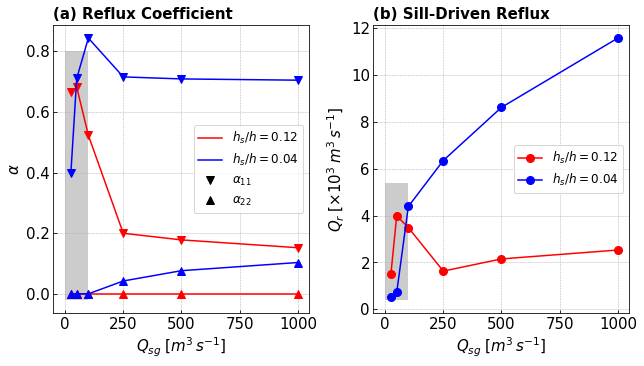

In [5]:
# Remove Temp and Qsm subplots
fig3 = plt.figure(figsize=(10,5))
#fig1.tight_layout()
#plt.grid(linestyle='--', linewidth=0.5)    
ax1 = fig3.add_subplot(121)
ax2 = fig3.add_subplot(122)

# Reflux coeff plot
ax1.plot(Qsg,alp11_1,'v-r', Qsg,alp22_1,'^-r', ms=8,lw=1.5)
ax1.plot(Qsg,alp11_2,'v-b', Qsg,alp22_2,'^-b', ms=8,lw=1.5)

line1 = plt.Line2D((0,1),(0,0), color='r', lw=1.5, linestyle='-')
line2 = plt.Line2D((0,1),(0,0), color='b', lw=1.5, linestyle='-')
marker1 = plt.Line2D((0,1),(0,0), color='k', marker='v', ms=8,linestyle='')
marker2 = plt.Line2D((0,1),(0,0), color='k', marker='^', ms=8,linestyle='') 
ax1.legend([line1,line2,marker1,marker2],[r'$h_s/h=0.12$',r'$h_s/h=0.04$',r'$\alpha_{11}$', r'$\alpha_{22}$'],
              loc='best', fontsize=12)

ax1.grid(linestyle='--', linewidth=0.5)
ax1.set_xlabel(r'$Q_{sg}\;[m^3\,s^{-1}]$',size = 15)
ax1.set_ylabel(r'$\alpha$',size = 15)
ax1.tick_params(direction='in', labelsize=15)
ax1.set_title(r'(a) Reflux Coefficient', loc='left', size=15, weight='bold')


# Add path for uncertain values
from matplotlib.patches import Rectangle
rect1 = Rectangle((0,-.02),100,.82,facecolor='k',alpha=0.2)
# Add the patch to the Axes
ax1.add_patch(rect1)


# Qe plot
ax2.plot(Qsg,Qe1/1e3,'o-r', Qsg,Qe2/1e3,'o-b',ms=8, lw=1.5)
ax2.legend([r'$h_s/h=0.12$',r'$h_s/h=0.04$'],loc='right', fontsize=12)
ax2.set_xlabel(r'$Q_{sg}\;[m^3\,s^{-1}]$',size = 15)
ax2.set_ylabel(r'$Q_r\;[\times10^3\;m^3\,s^{-1}]$',size = 15)
ax2.grid(linestyle='--', linewidth=0.5)
ax2.tick_params(direction='in', labelsize=15)
ax2.set_title(r'(b) Sill-Driven Reflux', loc='left', size=15, weight='bold')

# Add path for uncertain values
#rect2 = Rectangle((0,.5),150,.45,facecolor='k',alpha=0.2)
rect2 = Rectangle((0,.4),100,5,facecolor='k',alpha=0.2)
# Add the patch to the Axes
ax2.add_patch(rect2)



# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.2)

In [ ]:
fig2 = plt.figure(figsize=(5,5))
ax = fig2.add_subplot(111)

qsg = np.arange(0,1050,50)
#ax.plot(qsg,qsg**(2/5), 'k-',lw=3,alpha=.5,label=r'$Q^{2/5}_{sg}$')
ax.plot(Qsg,Qsm1,'o-r',ms=6, lw=1.5,label=r'$h_s/h=0.12$')
ax.plot(Qsg,Qsm2,'o-b',ms=6, lw=1.5,label=r'$h_s/h=0.04$')
ax.plot(Qsg,Qsm3,'o-k',ms=6, lw=1.5,label=r'$h_s/h=1$')
ax.legend(loc='best', fontsize=12)
ax.set_xlabel(r'$Q_{sg}\;[m^3/s]$',size = 15)
ax.set_ylabel(r'$Q_{sm}\;[m^3/s]$',size = 15)
ax.grid(linestyle='--', linewidth=0.5)
ax.tick_params(direction='in', labelsize=15)
#ax4.set_title(r'(d) Submarine Melting', loc='left', size=15, weight='bold')
Qsm2/Qsm1

In [6]:
fig_path ="/home/1959/Jupyter_Figs/FjordModeling/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)
#fig2.savefig(fig_path + '/6-QsgCase.png', dpi=300, bbox_inches='tight')
fig3.savefig(fig_path + '/Qsg-Reflux.png', dpi=300, bbox_inches='tight') 